<a href="https://colab.research.google.com/github/safletcher/handson-ml2/blob/develop/10_MLP_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
!pip install -q tensorflow==2.0.0b1

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

print(tf.__version__)
print(tf.keras.__version__)

2.0.0-beta1
2.2.4-tf


In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [50]:
(X_train_full, Y_train_full), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [0]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
Y_valid, Y_train = Y_train_full[:5000], Y_train_full[5000:]

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [53]:
class_names[Y_train[0]]

'Coat'

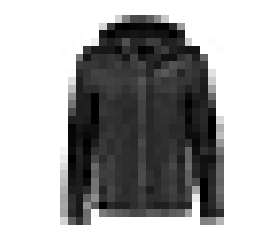

In [54]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.imshow(X_train_full[5000], cmap="binary")
plt.axis('off')
plt.show()

Saving figure fashion_mnist_plot


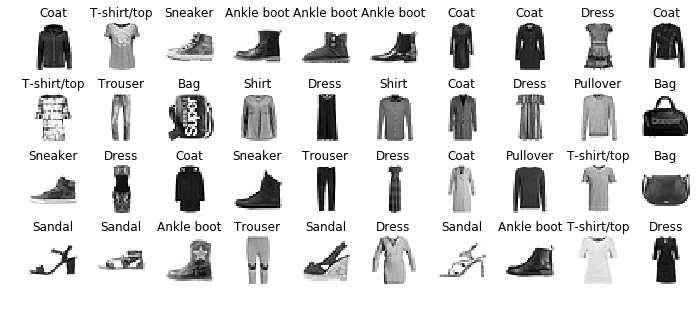

In [55]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[Y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(100,activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(len(class_names),activation=tf.keras.activations.softmax))




In [0]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)